# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**:if i am working for Motivate:
            1.which months have the largest number of users?
            2.Which day has the largest number of users?
            3.How old are the most regular users?
            if i am a user of this sevice:
            1.which station is the most close for my home, and what is the distance ?

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [12]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

SyntaxError: invalid syntax (<ipython-input-12-3618d4f33ef9>, line 6)

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip =next(trip_reader)
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    # YOUR CODE HERE
    if city=='Washington':
        duration = float(datum['Duration (ms)'] )/ (1000*60)
    if city=='NYC' or city=='Chicago':
        duration = float(datum['tripduration']) / 60
    
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    # YOUR CODE HERE
    if city=='NYC' :
        formatted_time= datetime.strptime(datum['starttime'],'%m/%d/%Y %H:%M:%S')
        month=int(datetime.strftime(formatted_time,'%m'))
        hour=int(datetime.strftime(formatted_time,'%H'))
        day_of_week=datetime.strftime(formatted_time,'%A')
    if city=='Washington':
        formatted_time= datetime.strptime(datum['Start date'],'%m/%d/%Y %H:%M')
        month=int(datetime.strftime(formatted_time,'%m'))
        hour=int(datetime.strftime(formatted_time,'%H'))
        day_of_week=datetime.strftime(formatted_time,'%A')
     
    if city=='Chicago':
        formatted_time= datetime.strptime(datum['starttime'],'%m/%d/%Y %H:%M')
        month=int(datetime.strftime(formatted_time,'%m'))
        hour=int(datetime.strftime(formatted_time,'%H'))
        day_of_week=datetime.strftime(formatted_time,'%A')
        
   
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]
    

In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    if city == 'Washington':
        if datum['Member Type']=='Registered':
            user_type ='Subscriber'
        else:
            user_type ='Customer'
    
    
    else: 
        user_type=datum['usertype']
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert  type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point['duration']=duration_in_mins(row, city)
            new_point['month'],new_point['hour'],new_point['day_of_week']=time_of_trip(row, city)
            new_point['user_type']=type_of_user(row, city)

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            
            

In [7]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**:As the output of my code below, the city that has the highest number of trips is **NYC** ,and also the city that has the highest proportion of trips made by subscribers is **NYC**,and the city that has the highest proportion of trips made by short-term customers is **Chicago**.

In [8]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        ## compute total number of rides##
        n_total = n_subscribers + n_customers
        
       
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [9]:
from prettytable import PrettyTable
x = PrettyTable()

## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

##import the itemgetter function from operator module to use it in the key of the max function##
from operator import itemgetter

data_file = './examples/BayArea-Y3-Summary.csv'
print(number_of_trips(data_file))

## defining cities_files dictionary to use the value(the condensed data file) of each key(city)##
##as an argument for the number_of_trips function to use the return values of this function to help us in answering Q 4a ##
cities_files = {'Washington':'./data/Washington-2016-Summary.csv',
                'NYC':'./data/NYC-2016-Summary.csv',
                'Chicago':'./data/Chicago-2016-Summary.csv'}

##set up three dictionaries to hold the number of subscribers,the number ##
##of customers,total number of users for each city##
p_subscribers={}
p_customers={}
n_total={}

for city in cities_files:
    ##the returned values from the number_of_trips function stored in a tuple,##
    ##compute the proportion of subscribers and customers##
    
    p_subscribers[city] = (number_of_trips(cities_files[city])[0] / number_of_trips(cities_files[city])[2]) *100
    ## round the proportions to two decimal values##
    p_subscribers[city] = '%.2f'%p_subscribers[city]+'%'
    
    p_customers[city]= (number_of_trips(cities_files[city])[1] /number_of_trips(cities_files[city])[2]) *100
    p_customers[city] = '%.2f'%p_customers[city]+'%'
    
    ##the index number 2 in the tuple has the total number of users ##
    n_total[city]= number_of_trips(cities_files[city])[2]

##set up a pretty table##
x.field_names = ["City name", "Area", "Population", "Annual Rainfall"]

for city in cities_files:
    x.add_row[city,p_subscribers[city],p_customers[city],n_total[city]]
    
print ('the proportion of subscribers: ',p_subscribers)
print ('the proportion of customers:',p_customers)
print ('the total number: ',n_total)

##calculating the maximum number for each type of user and the total number## 
##of users across the three cities using the built-in max function##
##The method items() returns a list of dict's (key, value) tuple pairs##
##itemgetter function return the index number 1 for each tuple ##

print('\n') 
max_total_city = max(n_total.items(),key=itemgetter(1))[0]
print('the city that has the highest number of trips is: ',max_total_city)

##the returned value from the max function is a tuple (city,number),adding [0] to get only the name of the city##

max_subscribers_city = max(p_subscribers.items(),key=itemgetter(1))[0]
print('the city that has the highest proportion of trips made by subscribers is:',max_subscribers_city)

max_customers_city = max(p_customers.items(),key=itemgetter(1))[0]
print('the city that has the highest proportion of trips made by short-term customers is:',max_customers_city)

ModuleNotFoundError: No module named 'prettytable'

> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: the average trip duration in **Washington** is : **18minutes and 54seconds** , 
            the average trip duration in **NYC** is : **15minutes and 48seconds**, 
            the average trip duration in **Chicago** is :  **16minutes and 36seconds** .

the proportion of trips more than 30 minutes in **Washington** : **10.8%** ,   the proportion of trips more than 30 minutes in **NYC** : **7.3%** , the proportion of trips more than 30 minutes in **Chicago** : **8.3%** .

In [74]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##

def avg_trip_length(filename):
    """
    this function is to calculate the average of trip length for each city
    """
    with open(filename,'r') as f_in:
        ## set up the csv reader object ##
        reader=csv.DictReader(f_in)
        
        ## initialize a count variable and a sum variable ##
        n = 0
        sum_durations = 0
        ## calculate the sum of the durations and count the number of trips ##
        for row in reader:
            n += 1
            sum_durations  += float(row['duration'])
        ## compute the average of the trip duration ##
        avg_duration = sum_durations / n
        
        return avg_duration
##define a function to convert duration to be in minutes and seconds##
def mins_seconds(x):
    ##initialize alist to hold the values minutes and seconds##
    list_dur = []
    ##round the duration to one decimal vlaue##
    duration = "%.1f"%x
    list_dur = duration.split('.')
    minutes = list_dur[0]
    seconds = (int(list_dur[1]) / 10) * 60
    ##convert seconds to int first to omit the zero decimals then convert to str
    seconds = str(int(seconds))
    return (minutes,seconds)

In [75]:
##test the function above##
data_file = './examples/BayArea-Y3-Summary.csv'
print(avg_trip_length(data_file))

## defining cities_files dictionary to use the value(the condensed data file) of each key(city)##
cities_files = {'Washington':'./data/Washington-2016-Summary.csv',
                'NYC':'./data/NYC-2016-Summary.csv',
                'Chicago':'./data/Chicago-2016-Summary.csv'}



##compute the average trip duration for each city ##
for city in cities_files:
                                        
     print ('the average trip duration in {} is : '.format(city),
           mins_seconds(avg_trip_length(cities_files[city]))[0]+'minutes and ' +
                        mins_seconds(avg_trip_length(cities_files[city]))[1]+'seconds')
    
                                           
    

14.038656929671422
the average trip duration in Washington is :  18minutes and 54seconds
the average trip duration in NYC is :  15minutes and 48seconds
the average trip duration in Chicago is :  16minutes and 36seconds


In [76]:
def num_more_30(filename):
    """
    this function is to count number of trips more than 30-minutes duration
    ,then the proportion of it
    """
    with open(filename,'r') as f_in:
        ##set up a csv reader object##
        reader = csv.DictReader(f_in)
        
        ## initialize count variables
        n_more30 = 0
        n = 0
        
        for row in reader:
            n += 1
            if float(row['duration']) > 30:
                n_more30 += 1
                
        p_more30 = (n_more30 / n) * 100
        
        ##round the proportion of number of trips more than 30 to one decimal value##
        p_more30 = "%.1f"%p_more30 +'%'
        
        return p_more30        
                
                 
    

In [77]:
data_file = './examples/BayArea-Y3-Summary.csv'
print('the proportion of trips more than 30 minutes for BayArea example is',num_more_30(data_file))

## defining cities_files dictionary to use the value(the condensed data file) of each key(city)##
cities_files = {'Washington':'./data/Washington-2016-Summary.csv',
                'NYC':'./data/NYC-2016-Summary.csv',
                'Chicago':'./data/Chicago-2016-Summary.csv'}
for city in cities_files:
    print('the proportion of trips more than 30 minutes in {} : '.format(city) + num_more_30(cities_files[city]))

the proportion of trips more than 30 minutes for BayArea example is 3.5%
the proportion of trips more than 30 minutes in Washington : 10.8%
the proportion of trips more than 30 minutes in NYC : 7.3%
the proportion of trips more than 30 minutes in Chicago : 8.3%


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: the trip duration for subscribers in NYC is :  13.68 and 
the trip duration for customers in NYC is :  32.78

In [78]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##
def avg_per_user_type(filename):
    """
    this function is to calculate the average of trip length for each city
    """
    with open(filename,'r') as f_in:
        ## set up the csv reader object ##
        reader=csv.DictReader(f_in)
        
        ## initialize summation variables ##
        sum_dur_s = 0
        sum_dur_c = 0
        ## calculate the sum of the durations ##
        for row in reader:
            if row['user_type'] == 'Subscriber':
                sum_dur_s  += float(row['duration'])
            else:
                sum_dur_c += float(row['duration'])
                
        ## compute the average of the trip duration ##
        avg_dur_s = sum_dur_s /  number_of_trips(filename)[0]
        avg_dur_c = sum_dur_c /  number_of_trips(filename)[1]
        avg_dur_s = '%.2f'%avg_dur_s
        avg_dur_c ='%.2f'%avg_dur_c
        return (avg_dur_s,avg_dur_c)
    


In [79]:
data_file = './examples/BayArea-Y3-Summary.csv'
print('the trip duration for subscribers on average for BayArea example is : ',avg_per_user_type(data_file)[0])
print('the trip duration for customers on average for BayArea example is : ',avg_per_user_type(data_file)[1],'\n')

cities_files = {'Washington':'./data/Washington-2016-Summary.csv',
                'NYC':'./data/NYC-2016-Summary.csv',
                'Chicago':'./data/Chicago-2016-Summary.csv'}

for city in cities_files:
    print('the trip duration for subscribers on average in {} is : '.format(city),avg_per_user_type(cities_files[city])[0])
    print('the trip duration for customers on average in {} is : '.format(city),avg_per_user_type(cities_files[city])[1],'\n')

the trip duration for subscribers on average for BayArea example is :  9.51
the trip duration for customers on average for BayArea example is :  54.55 

the trip duration for subscribers on average in Washington is :  12.53
the trip duration for customers on average in Washington is :  41.68 

the trip duration for subscribers on average in NYC is :  13.68
the trip duration for customers on average in NYC is :  32.78 

the trip duration for subscribers on average in Chicago is :  12.07
the trip duration for customers on average in Chicago is :  30.98 



<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

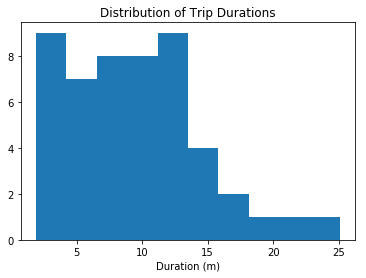

In [80]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

In [81]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##


def plot_times(filename,city):
    """
    this function is to polt the trip duration times
    """ 
    list_times = []
    with open(filename,'r') as f_in:
        ## set up the csv reader object ##
        reader1=csv.DictReader(f_in)
        for row in reader1:
            list_times.append(float(row['duration']))
            
    plt.hist(list_times)
    plt.title('Distribution of Trip Durations in {}'.format(city))
    plt.xlabel('Duration (m)')
    plt.show() 
    
        


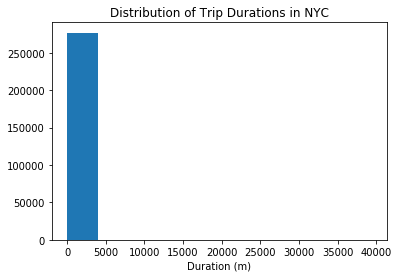

In [82]:
plot_times('./data/NYC-2016-Summary.csv','NYC')

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: the peak of each distribution is in the left side of it,The "tail" of the histogram is pulled toward higher positive numbers, or to the right, for the subscribers shape,the peak is in (5-10)m ,and for the customers the peak is for (20-25)m, as i know this is the right-skewed distribution  

In [83]:
## Use this and additional cells to answer Question 5. ##

def plot_per_user_type(filename,city):
    """
    this function is to polt the trip duration times
    """ 
    list_subscriber = []
    list_customer = []
    
    bins = []
    n=0
    while n !=80:
        bins.append(n)
        n += 5
        
    with open(filename,'r') as f_in:
        ## set up the csv reader object ##
        reader=csv.DictReader(f_in)
        for row in reader:
            if row['user_type'] == 'Subscriber':
                list_subscriber.append(float(row['duration']))
            else:
                list_customer.append(float(row['duration']))
                
                
            
    plt.hist(list_subscriber,bins)
    plt.title('Distribution of Trip Durations in {} for Subscibers'.format(city))
    plt.xlabel('Duration (m)')
    plt.show()
    plt.hist(list_customer,bins)
    plt.title('Distribution of Trip Durations in {} for Customers'.format(city))
    plt.xlabel('Duration (m)')
    plt.show()

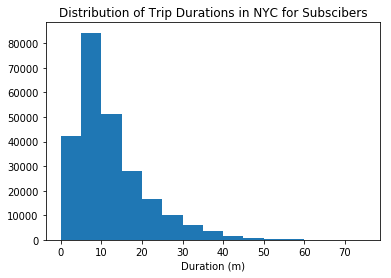

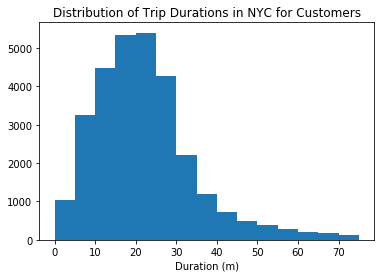

In [84]:
plot_per_user_type('./data/NYC-2016-Summary.csv','NYC')

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: I will investigate this questions:
Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?

1) Defining a **wends_wdays()** function to compute the number of trips on average in weekends and weekdays for all users  , subscribers and customers. 

2) plotting a bar plot for the three cities to explore the number of trips in each city in weekends vs weekdays,by defining a **plot_cities()** function : 
from the plot ,**the number of trips in weekends are less than the number of trips in weekdays for all cities**.

3)plotting a bar plot for exploring which days are subscribers and customers most likely to use the system by defining a**plot_days()** function for that , and that is clear from the plot :**Subscribers are most likely to use the system in the weekdays but Customers are most likely to use the system in the weekends**.

4)plotting a bar plot for exploring the changing in the average duration of trips depending on the day of the week,by defining a **plot_dur_day()** function for that, from the plot, **the average duration of rides in weekends is longer than the average duration of rides in weekdays**.   
 

In [85]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##
import numpy as np
import matplotlib.pyplot as plt
def wends_wdays(filename):
    """
    compute the number of trips in weekdays and weekends used by both subscribers and
    customers and, then the total number of trips in general in weekends and weekdays,
    then compute the number of trips on average for all variables by division by 2 for
    weekends and division by 5 for weekdays to be fair in our comparasion
    
    """
    weekends_sub = 0
    weekdays_sub = 0
    weekends_cus = 0
    weekdays_cus = 0
    weekends_total = 0
    weekdays_total = 0
    
    with open(filename,'r') as file_in:
        reader_trip = csv.DictReader(file_in)
        
        for row in reader_trip:
            if row['user_type'] == 'Subscriber': 
                if row['day_of_week'] == 'Sunday' or row['day_of_week'] == 'Saturday':
                    weekends_sub += 1
                else:
                    weekdays_sub += 1
            else:
                 if row['user_type'] == 'Customer':
                    if row['day_of_week'] == 'Sunday' or row['day_of_week'] == 'Saturday':
                        weekends_cus += 1
                    else:
                        weekdays_cus += 1
                
        weekends_total = weekends_sub + weekends_cus
        weekdays_total = weekdays_sub + weekdays_cus
        
        ## compute the average number of trips per day according to the number of days##
        ## in weekends and in weekdays##
        weekends_sub = int(weekends_sub/2)
        weekdays_sub = int(weekdays_sub/5)
        weekends_cus = int(weekends_cus/2)
        weekdays_cus = int(weekdays_cus/5)
        weekends_total = int(weekends_total/2)
        weekdays_total = int(weekdays_total/5)
        
        
        return ( weekends_total,weekdays_total,weekends_sub,weekdays_sub,weekends_cus,weekdays_cus)
    





In [86]:
## calling the above function by passing the three cities files as arguments to analyze the results##

cities_files = {'Washington':'./data/Washington-2016-Summary.csv',
                'NYC':'./data/NYC-2016-Summary.csv',
                'Chicago':'./data/Chicago-2016-Summary.csv'}
for city in cities_files:
    print('the total number of trips in the weekends in {} is : '.format(city),wends_wdays(cities_files[city])[0])
    print('the total number of trips in the weekdays in {} is : '.format(city),wends_wdays(cities_files[city])[1])
    print('the number of trips are used by subscribers in weekends {} is: '.format(city),wends_wdays(cities_files[city])[2])
    print('the number of trips are used by subscribers in weekdays {} is: '.format(city),wends_wdays(cities_files[city])[3])
    print('the number of trips are used by customers in weekends {} is: '.format(city),wends_wdays(cities_files[city])[4])
    print('the number of trips are used by customers in weekdays {} is: '.format(city),wends_wdays(cities_files[city])[5])
    print('\n')

the total number of trips in the weekends in Washington is :  8563
the total number of trips in the weekdays in Washington is :  9839
the number of trips are used by subscribers in weekends Washington is:  5420
the number of trips are used by subscribers in weekdays Washington is:  8182
the number of trips are used by customers in weekends Washington is:  3143
the number of trips are used by customers in weekdays Washington is:  1657


the total number of trips in the weekends in NYC is :  32212
the total number of trips in the weekdays in NYC is :  42331
the number of trips are used by subscribers in weekends NYC is:  25290
the number of trips are used by subscribers in weekdays NYC is:  39063
the number of trips are used by customers in weekends NYC is:  6922
the number of trips are used by customers in weekdays NYC is:  3268


the total number of trips in the weekends in Chicago is :  9790
the total number of trips in the weekdays in Chicago is :  10510
the number of trips are used 

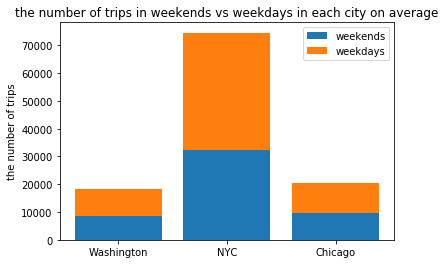

In [87]:
##plot the data above to be more clear by using the bar plot type##

def plot_cities():
    
    list_weekends = [] ## for appending the values of  number of trips in weekends for each city##
    list_weekdays = [] ## for appending the values of number of trips in weekdays for each city##
    
    cities_files = {'Washington':'./data/Washington-2016-Summary.csv',
                'NYC':'./data/NYC-2016-Summary.csv',
                'Chicago':'./data/Chicago-2016-Summary.csv'}
    for city in cities_files:
        list_weekends.append(wends_wdays(cities_files[city])[0])
        list_weekdays.append(wends_wdays(cities_files[city])[1])
   
    p1 = plt.bar(np.arange(3),list_weekends)
    p2 = plt.bar(np.arange(3),list_weekdays,bottom=list_weekends)
    
    plt.ylabel('the number of trips')
    plt.title('the number of trips in weekends vs weekdays in each city on average')
    plt.xticks(np.arange(3),('Washington','NYC','Chicago'))
    plt.legend((p1[0],p2[0]),('weekends','weekdays'))
    
    plt.show()
## calling the function to see the plot
plot_cities()    

{'Saturday': {'subscribers': 26126, 'customers': 7227}, 'Sunday': {'subscribers': 24454, 'customers': 6898}, 'Monday': {'subscribers': 35623, 'customers': 3717}, 'Thursday': {'subscribers': 41197, 'customers': 3133}, 'Wednesday': {'subscribers': 41403, 'customers': 3226}, 'Tuesday': {'subscribers': 39487, 'customers': 2918}, 'Friday': {'subscribers': 37606, 'customers': 3783}}


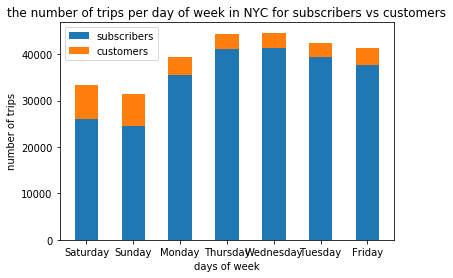

In [88]:
def plot_days(filename,city):
    
    y_subscribers= []## a list for appending number of trips per day of week used by subscribers##
    y_customers =[]  ## a list for appending number of trips per day of week used by customers##   
    
    ## set up a dictionary for holding the number of subscribers and customers per day of week##
    dic_days = {'Saturday':{'subscribers':0,'customers':0} ,'Sunday':{'subscribers':0,'customers':0},
                'Monday':{'subscribers':0,'customers':0},'Thursday':{'subscribers':0,'customers':0},
                'Wednesday':{'subscribers':0,'customers':0},'Tuesday':{'subscribers':0,'customers':0},
                'Friday':{'subscribers':0,'customers':0}} 
    
    x = np.arange(7)

    with open(filename,'r') as f_in:
        reader_trip = csv.DictReader(f_in)
        
        ## count number of trips used by subscribers and customers 
        for row in reader_trip:
            if row['user_type']=='Subscriber':
                dic_days[row['day_of_week']]['subscribers'] += 1
            else:
                dic_days[row['day_of_week']]['customers'] += 1
    
    ## to see the data in dic_days print it##            
    print(dic_days) 
   
    for day in dic_days:
        y_subscribers.append(dic_days[day]['subscribers'])
        y_customers.append(dic_days[day]['customers'])
    
    p1 = plt.bar(x,y_subscribers,width = .5)
    p2 = plt.bar(x,y_customers,width=.5,bottom=y_subscribers)
    plt.xticks(x,('Saturday','Sunday','Monday','Thursday','Wednesday','Tuesday','Friday'))
    plt.ylabel('number of trips')
    plt.xlabel('days of week')
    plt.title('the number of trips per day of week in {} for subscribers vs customers'.format(city))
    plt.legend((p1[0],p2[0]),('subscribers','customers'))
    plt.show()

## calling the function using NYC city condensed data file ##   
plot_days( './data/NYC-2016-Summary.csv','NYC')    
        

dict_items([('Saturday', {'num_trips': 33353, 'sum_duration': 626901.5833333371, 'avg_duration': 18.8}), ('Sunday', {'num_trips': 31352, 'sum_duration': 589086.3333333292, 'avg_duration': 18.79}), ('Monday', {'num_trips': 39340, 'sum_duration': 593087.9666666627, 'avg_duration': 15.08}), ('Thursday', {'num_trips': 44330, 'sum_duration': 645132.3499999949, 'avg_duration': 14.55}), ('Wednesday', {'num_trips': 44629, 'sum_duration': 653204.4166666637, 'avg_duration': 14.64}), ('Tuesday', {'num_trips': 42405, 'sum_duration': 606265.6166666662, 'avg_duration': 14.3}), ('Friday', {'num_trips': 41389, 'sum_duration': 663215.8499999953, 'avg_duration': 16.02})])


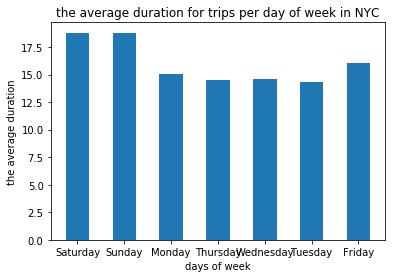

In [89]:
def plot_dur_days(filename,city):
    
    y_avg_duration = [] ## for holding the average duration of trips per day ##
    dic_days = {'Saturday':{'num_trips':0,'sum_duration':0} ,
                'Sunday':{'num_trips':0,'sum_duration':0},
                'Monday':{'num_trips':0,'sum_duration':0},
                'Thursday':{'num_trips':0,'sum_duration':0},
                'Wednesday':{'num_trips':0,'sum_duration':0},
                'Tuesday':{'num_trips':0,'sum_duration':0},
                'Friday':{'num_trips':0,'sum_duration':0}} 
    x = np.arange(7)

    with open(filename,'r') as f_in:
        reader_trip = csv.DictReader(f_in)
        
        ##counting number of trips and summing the trips duration for each day of week ##
        ## for computing the average duration for each day of week ##
        for row in reader_trip:
            dic_days[row['day_of_week']]['num_trips'] += 1
            dic_days[row['day_of_week']]['sum_duration'] += float(row['duration'])
   
    ## compute the average duration for each day of week and store valuse in a list ##
    for day in dic_days:
        dic_days[day]['avg_duration'] = dic_days[day]['sum_duration'] / dic_days[day]['num_trips']
        dic_days[day]['avg_duration']='%.2f'%dic_days[day]['avg_duration']
        dic_days[day]['avg_duration']=float(dic_days[day]['avg_duration'])
        y_avg_duration.append(dic_days[day]['avg_duration'])
    
    ## to see the data in dic_days, print it ##
    print(dic_days.items())
   
    ## set up the bar plot
    plt.bar(x,y_avg_duration,width = .5)
    plt.xticks(x,('Saturday','Sunday','Monday','Thursday','Wednesday','Tuesday','Friday'))
    plt.ylabel('the average duration')
    plt.xlabel('days of week')
    plt.title('the average duration for trips per day of week in {}'.format(city))
    plt.show()
    
## calling the function using NYC city condensed data file ##    
plot_dur_days( './data/NYC-2016-Summary.csv','NYC') 

### My curiosity in exploring the age of users	

I have analyzed the age of users according to dividing the ages to many periods, it is clear from the plot below that the most users are in range (20-30) years old, it seems that the age is increasing ,the number of trips is decreasing. i think knowing the ages of users is so important especially for online marketing in targeting audiences and other things sure.
the function below is for Chicago only because only it has a birthyear data


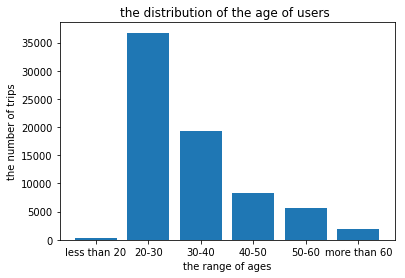

In [90]:
def plot_birth(filename):
    """
    this function is to explore and plot the age of users 
    """
    list_birth = [] ## for holding the ages of users ##
    dic_birth = {'less than 20':0 , '20-30':0, '30-40':0, '40-50':0,'50-60':0,'more than 60':0}
   
   
    x = np.arange(6)
   
    with open(filename,'r') as f_in:
        trip_reader = csv.DictReader(f_in)
        
        for row in trip_reader:
            if len(row['birthyear']) == 4:
                age = 2016 - int(row['birthyear'])
                list_birth.append(age)
            ## some users don't put their year birth , i put instead a 0 value ##    
            else:
                list_birth.append(0)
                
    
           
        for age in list_birth:
            if 0< age < 20:
                dic_birth['less than 20'] += 1
            elif age < 30:
                dic_birth['20-30'] += 1
            elif age < 40:
                dic_birth['30-40'] += 1
            elif age < 50:
                dic_birth['40-50'] += 1
            elif age < 60:
                dic_birth['50-60'] += 1
            else:
                dic_birth['more than 60'] += 1
                
      
                
    plt.bar(x,dic_birth.values())
    plt.xticks(x,('less than 20','20-30','30-40','40-50','50-60','more than 60'))
    plt.title('the distribution of the age of users ')
    plt.xlabel('the range of ages')
    plt.ylabel('the number of trips')
    plt.show
    
## this function for Chicago because only it has a yearbirth data  ##             
plot_birth('./data/Chicago-Divvy-2016.csv')            


In [91]:
print('thanks Udacity for this interesting project')

thanks Udacity for this interesting project


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: I think of an online shopping website has a lot of items for customers, and many channels for online marketing like facebook,twitter,instagram,adwords and others, the owner of the website wants to know which items the customers buy and which items are not bought, and which channels drive the most traffic of the website and which channels should be invest in, and other things to investigate to improve this online center.

the owner has a lot of data about the number of users enter the website per day from each channel, and number of buyers from each channel everday, we can clean the data by collecting number of users and number of buyers  per month for each channel, then calculate the proportion of buying process made by all users for each channel monthly then plot the data to see which channel is the best in driving traffic, which one has a high quality traffic, and which one the owner should invest in more .

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

## resources:

1) www.stackoverflow.com

2)https://docs.python.org/2/library/functions.html#max

3)http://www.statisticshowto.com/probability-and-statistics/skewed-distribution/

4)https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html#numpy.arange

5)https://docs.python.org/3/library/operator.html

6)https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py



In [4]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'analyzing Bike_Share_System.ipynb'])

0